<a href="https://colab.research.google.com/github/rohit3171999/Landslide-Prediction-Major-Project-/blob/main/Landslide_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [24]:
dt=pd.read_csv('/content/update2.csv')


In [25]:
dt.head()

,Rainfall (mm),Slope Angle (Degree),Soil Depth(cm),Altitude (Feet),Average relative humidity (%),Temperature,Target
0,26.00,14,120,852,48.19,12.85,0
1,24.01,36,58,782,46.04,16.59,1
2,23.47,22,34,2564,35.99,22.39,1
3,14.49,36,85,12543,27.62,28.56,1
4,35.11,27,1582,18523,26.53,32.68,0


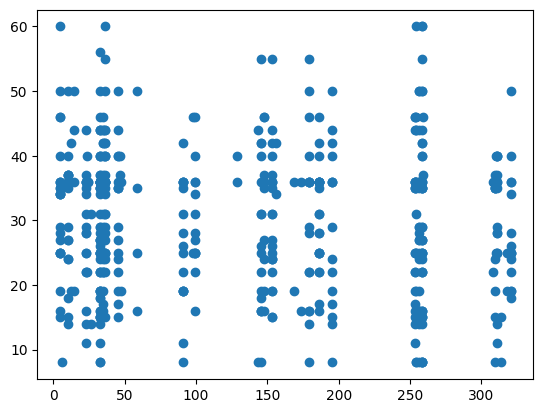

In [26]:
plt.scatter(dt['Rainfall (mm)'],dt['Slope Angle (Degree)'])

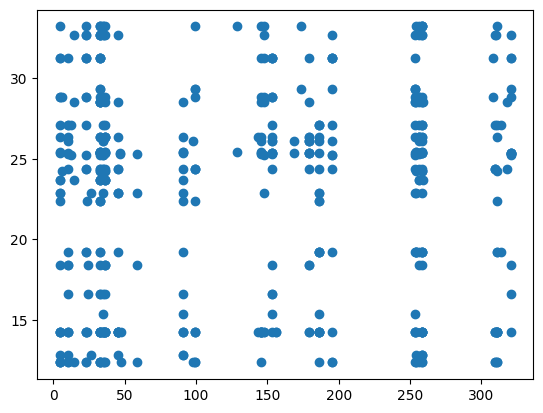

In [27]:
plt.scatter(dt['Rainfall (mm)'],dt['Temperature'])

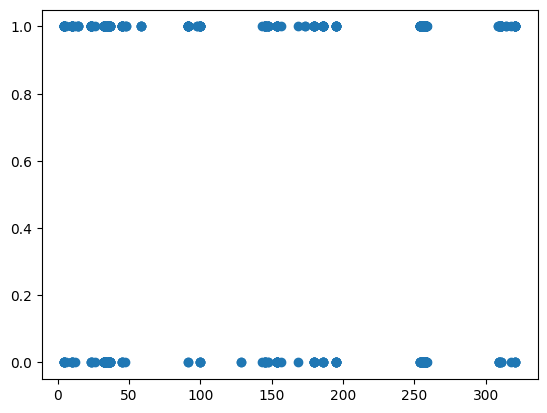

In [28]:
plt.scatter(dt['Rainfall (mm)'],dt['Target'])

In [29]:
import pickle
from flask import Flask, request, render_template

In [30]:
## seperating target rows from dataset
X=dt.iloc[:,:-1]
Y=dt['Target']

In [31]:
X


,Rainfall (mm),Slope Angle (Degree),Soil Depth(cm),Altitude (Feet),Average relative humidity (%),Temperature
0,26.00,14,120,852,48.19,12.85
1,24.01,36,58,782,46.04,16.59
2,23.47,22,34,2564,35.99,22.39
3,14.49,36,85,12543,27.62,28.56
4,35.11,27,1582,18523,26.53,32.68
...,...,...,...,...,...,...
495,34.98,25,48,12543,35.99,24.36
496,4.54,34,52,18523,27.62,14.23
497,10.05,37,248,21563,26.53,25.36
498,90.98,19,156,12895,40.62,15.36


In [32]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
495    0
496    1
497    1
498    1
499    1
Name: Target, Length: 500, dtype: int64

In [33]:
#training dataset size is 80%
#testing dataset size is 20%
# using random state beacuse stop choosing random samples of X_train
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=.2, random_state=10)

In [34]:
X_train

,Rainfall (mm),Slope Angle (Degree),Soil Depth(cm),Altitude (Feet),Average relative humidity (%),Temperature
305,23.12,37,44,19125,26.53,33.23
107,258.22,16,49,25000,81.54,27.12
350,320.56,22,36,14563,27.62,25.36
334,10.05,37,25,14563,56.23,26.11
142,90.98,28,147,6458,56.04,19.25
...,...,...,...,...,...,...
320,45.22,44,300,25413,54.00,24.36
15,32.97,44,44,14563,72.61,31.25
484,320.56,25,152,500,40.62,25.36
125,4.54,60,156,23000,46.04,12.36


In [35]:
len(X_train)

400

In [36]:
len(X_test)

100

In [37]:
X_test

,Rainfall (mm),Slope Angle (Degree),Soil Depth(cm),Altitude (Feet),Average relative humidity (%),Temperature
151,45.220,22,25,14563,56.23,14.26
424,195.250,24,36,19125,58.25,25.23
154,36.250,36,25,14589,58.36,14.23
190,153.440,24,258,17568,24.36,31.25
131,310.598,11,201,500,81.54,33.23
...,...,...,...,...,...,...
50,34.980,22,258,18563,63.45,25.36
264,32.300,15,152,23000,75.54,33.23
34,179.250,14,56,14526,25.66,26.11
78,90.980,19,36,18523,63.45,14.26


In [38]:
X_train

,Rainfall (mm),Slope Angle (Degree),Soil Depth(cm),Altitude (Feet),Average relative humidity (%),Temperature
305,23.12,37,44,19125,26.53,33.23
107,258.22,16,49,25000,81.54,27.12
350,320.56,22,36,14563,27.62,25.36
334,10.05,37,25,14563,56.23,26.11
142,90.98,28,147,6458,56.04,19.25
...,...,...,...,...,...,...
320,45.22,44,300,25413,54.00,24.36
15,32.97,44,44,14563,72.61,31.25
484,320.56,25,152,500,40.62,25.36
125,4.54,60,156,23000,46.04,12.36


In [39]:
len(X_train)

400

In [40]:
Y_test

151    1
424    1
154    0
190    0
131    1
      ..
50     1
264    1
34     1
78     1
223    0
Name: Target, Length: 100, dtype: int64

In [41]:
len(Y_train)

400

In [42]:
len(Y_test)

100

In [43]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Rainfall (mm)                  500 non-null    float64
 1   Slope Angle (Degree)           500 non-null    int64  
 2   Soil Depth(cm)                 500 non-null    int64  
 3   Altitude (Feet)                500 non-null    int64  
 4   Average relative humidity (%)  500 non-null    float64
 5   Temperature                    500 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 23.6 KB


CLASSIFIER

# Decision Tree

In [44]:
#decision tree is a single model 
#that makes predictions based on a series of if-then rules

In [45]:
dtc= DecisionTreeClassifier()

In [46]:
dtc.fit(X_train, Y_train)

DecisionTreeClassifier()

In [47]:
dtc.score(X_train, Y_train)

1.0

In [48]:
dtc_pred=dtc.predict(X_test)

In [49]:
dtc_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0])

In [50]:
dtc

DecisionTreeClassifier()

In [51]:
dtc= DecisionTreeClassifier( criterion='gini',
    splitter='best',
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=10,
    max_leaf_nodes=5)
dtc.fit(X_train, Y_train)
dtc_pred=dtc.predict(X_test)
print("The Accuracy is",accuracy_score(Y_test, dtc_pred)*100)

The Accuracy is 72.0


In [52]:
#this is on default values
dtc= DecisionTreeClassifier( criterion='gini', 
                            splitter='best', 
                            max_depth=None, 
                            min_samples_split=2, 
                            min_samples_leaf=1, 
                            min_weight_fraction_leaf=0.0, 
                            max_features=None, 
                            random_state=None, 
                            max_leaf_nodes=None, 
                            min_impurity_decrease=0.0, 
                            class_weight=None, 
                            ccp_alpha=0.0)
dtc.fit(X_train, Y_train)
dtc_pred=dtc.predict(X_test)
print("The Accuracy is",accuracy_score(Y_test, dtc_pred)*100)

The Accuracy is 59.0


# Random Forest

In [53]:
## Random forest is a ensemble learning method, 
## which means it uses a combination of multiple models to make predictions.

In [54]:
random = RandomForestClassifier()

In [55]:
random.fit(X_train, Y_train)

RandomForestClassifier()

In [56]:
random.score(X_train, Y_train)

1.0

In [57]:
random_pred=random.predict(X_test)

In [58]:
random_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0])

In [59]:
random = RandomForestClassifier(criterion='gini',
    
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,max_features='auto',
    random_state=10,
    max_leaf_nodes=5,bootstrap=True)
random.fit(X_train, Y_train)
random_pred=random.predict(X_test)
print("The Accuracy is",accuracy_score(Y_test, random_pred)*100)

The Accuracy is 69.0


/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [60]:
random = RandomForestClassifier(criterion='gini',
    
    max_depth=5,
    min_samples_split=2,
    min_samples_leaf=1,max_features='auto',
    random_state=10,
    max_leaf_nodes=5,bootstrap=True)
random.fit(X_train, Y_train)
random_pred=random.predict(X_test)
print("The Accuracy is",accuracy_score(Y_test, random_pred)*100)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


The Accuracy is 69.0


In [61]:
#    Remaining Part of project

##train model on labelencoders
##==> train dataset on label encoders and generate new coloumn and 
##then again check acuuracy with the help of
##random forest and decision trees


In [62]:
import pickle
with open('landslide_pred','wb') as file:pickle.dump(random, file)